In [7]:
#%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from util_kw import count_words, get_words
from collections import defaultdict, OrderedDict
import pandas as pd
import os
import re

In [2]:
path_root_processed='./processedText'
path_models = './word2vec_models'
path_phraser_models='./phraser_models'

journal = 'IN-indianexpress-editorials' 
mypath_processed = path_root_processed +'/'+journal 

wvm = Word2Vec.load(path_models+'/'+journal+'_with_phraser').wv
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [6]:
def generate_time_series(l_words):
    wc = count_words(mypath_processed, journal, path_phraser_models, l_words)
    
    wc_summary = defaultdict(float)
    for d in wc.keys() :
        m = re.search('([0-9\-]+)\_', d)
        wc_summary[pd.to_datetime(m.group(1))] += wc[d]

    wc_ordered = OrderedDict(sorted(wc_summary.items()))
    ts_ret = pd.Series(wc_ordered.values(), index=wc_ordered.keys())
    return ts_ret

In [8]:
ts1 = generate_time_series(get_words(wvm, 'violence'))
ts2 = generate_time_series(get_words(wvm, 'muslim'))

./phraser_models/IN-indianexpress-editorials_00_bigramphraser
./phraser_models/IN-indianexpress-editorials_00_bigramphraser


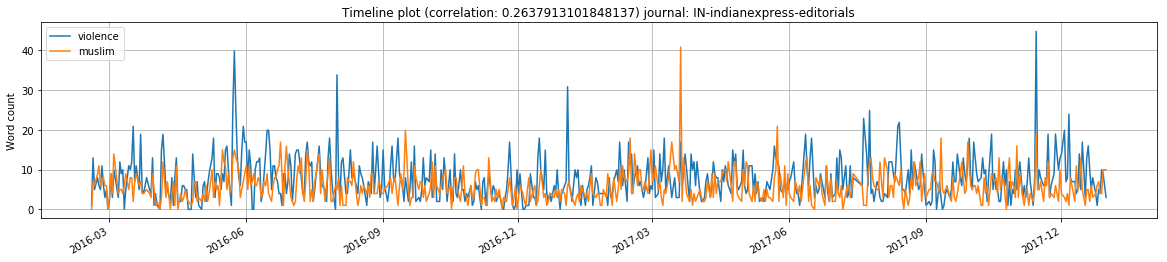

In [9]:
titletxt = '(correlation: '+ str(ts1.corr(ts2,method='pearson')) +') journal: '+ journal
plt.figure(figsize=(20,4))
ts1.plot(label='violence')
ts2.plot(label='muslim')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot "+ titletxt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()

In [10]:
ts3 = generate_time_series(get_words(wvm, 'dalits'))
ts4 = generate_time_series(get_words(wvm, 'incident'))

./phraser_models/IN-indianexpress-editorials_00_bigramphraser
./phraser_models/IN-indianexpress-editorials_00_bigramphraser


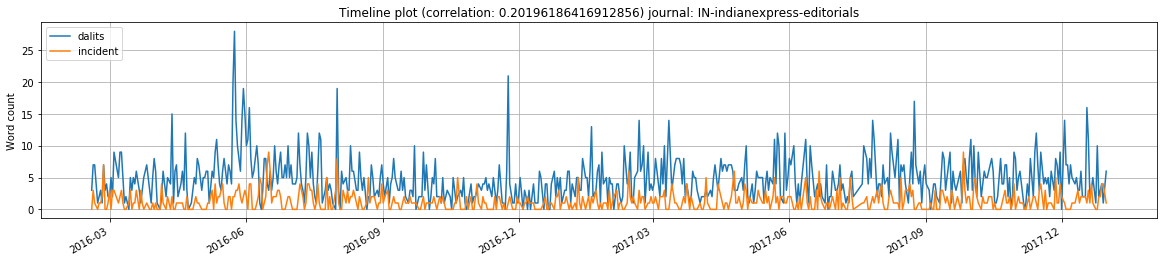

In [11]:
txt = '(correlation: '+ str(ts3.corr(ts4,method='pearson')) +') journal: '+ journal
plt.figure(figsize=(20,4))
ts3.plot(label='dalits')
ts4.plot(label='incident')
#plt.plot_date(x=wc_ordered.keys(), y=wc_ordered.values(), fmt="r-")
plt.title("Timeline plot "+ txt)
plt.legend(loc='upper left')
plt.ylabel("Word count")
plt.grid(True)
plt.show()